## Nico Data Analysis

In [35]:
# Importing libraries and dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('leetcode_dataset - lc.csv')
df.head()

,id,title,description,is_premium,difficulty,solution_link,acceptance_rate,frequency,url,discuss_count,accepted,submissions,companies,related_topics,likes,dislikes,rating,asked_by_faang,similar_questions
0,1,Two Sum,Given an array of integers `nums` and an integ...,0,Easy,/articles/two-sum,46.7,100.0,https://leetcode.com/problems/two-sum,999,4.1M,8.7M,"Amazon,Google,Apple,Adobe,Microsoft,Bloomberg,...","Array,Hash Table",20217,712,97,1,"[3Sum, /problems/3sum/, Medium], [4Sum, /probl..."
1,2,Add Two Numbers,You are given two non-empty linked lists repre...,0,Medium,/articles/add-two-numbers,35.7,93.1,https://leetcode.com/problems/add-two-numbers,999,1.9M,5.2M,"Bloomberg,Microsoft,Amazon,Google,Facebook,App...","Linked List,Math,Recursion",11350,2704,81,1,"[Multiply Strings, /problems/multiply-strings/..."
2,3,Longest Substring Without Repeating Characters,"Given a string `s`, find the length of the lon...",0,Medium,/articles/longest-substring-without-repeating-...,31.5,90.9,https://leetcode.com/problems/longest-substrin...,999,2.1M,6.7M,"Amazon,Bloomberg,Microsoft,Facebook,Apple,Adob...","Hash Table,Two Pointers,String,Sliding Window",13810,714,95,1,[Longest Substring with At Most Two Distinct C...
3,4,Median of Two Sorted Arrays,Given two sorted arrays `nums1` and `nums2` of...,0,Hard,/articles/median-of-two-sorted-arrays,31.4,86.2,https://leetcode.com/problems/median-of-two-so...,999,904.7K,2.9M,"Amazon,Goldman Sachs,Facebook,Microsoft,Apple,...","Array,Binary Search,Divide and Conquer",9665,1486,87,1,NaN
4,5,Longest Palindromic Substring,"Given a string `s`, return the longest palindr...",0,Medium,/articles/longest-palindromic-substring,30.6,84.7,https://leetcode.com/problems/longest-palindro...,999,1.3M,4.1M,"Amazon,Microsoft,Wayfair,Facebook,Adobe,eBay,G...","String,Dynamic Programming",10271,670,94,1,"[Shortest Palindrome, /problems/shortest-palin..."


### Start of Data Analysis

In [3]:
# Get the number of rows and columns
df.shape

(1825, 19)

In [40]:
# Get the column names
print(df.columns)

Index(['id', 'title', 'description', 'is_premium', 'difficulty',
       'solution_link', 'acceptance_rate', 'frequency', 'url', 'discuss_count',
       'accepted', 'submissions', 'companies', 'related_topics', 'likes',
       'dislikes', 'rating', 'asked_by_faang', 'similar_questions'],
      dtype='object')


In [5]:
# Get the data types of each column
df.dtypes

id                     int64
title                 object
description           object
is_premium             int64
difficulty            object
solution_link         object
acceptance_rate      float64
frequency            float64
url                   object
discuss_count          int64
accepted              object
submissions           object
companies             object
related_topics        object
likes                  int64
dislikes               int64
rating                 int64
asked_by_faang         int64
similar_questions     object
dtype: object

In [6]:
# Get the number of unique values in each column
df.nunique()

id                   1825
title                1825
description          1670
is_premium              2
difficulty              3
solution_link         987
acceptance_rate       576
frequency             619
url                  1825
discuss_count         642
accepted             1098
submissions          1236
companies             691
related_topics        320
likes                1161
dislikes              603
rating                 94
asked_by_faang          2
similar_questions     689
dtype: int64

In [7]:
# Get the number of missing values in each column
df.isnull().sum()

id                      0
title                   0
description             0
is_premium              0
difficulty              0
solution_link         838
acceptance_rate         0
frequency               0
url                     0
discuss_count           0
accepted                0
submissions             0
companies              76
related_topics        254
likes                   0
dislikes                0
rating                  0
asked_by_faang          0
similar_questions    1080
dtype: int64

In [10]:
# Get the number of premium questions (denoted by 1) and non-premium questions (denoted by 0)
df['is_premium'].value_counts()

0    1427
1     398
Name: is_premium, dtype: int64

In [12]:
# Get the number of questions for each difficulty level
df['difficulty'].value_counts()

Medium    963
Easy      477
Hard      385
Name: difficulty, dtype: int64

In [28]:
# Get the list of unique companies in the dataset, the companies column contains a list of companies for each question separated by a comma
# We will use the explode function to get the list of unique companies
companies_list = df['companies'].str.split(',').explode().unique()

# Get the number of unique companies
print('Number of companies: ', len(companies_list), '\n')

# Get the number of questions for each company and show the top 15 companies
print('Top 15 most common companies: ')
df['companies'].str.split(',').explode().value_counts().head(15)

Number of companies:  200 

Top 15 most common companies: 


Amazon           690
Google           553
Facebook         411
Microsoft        355
Bloomberg        220
Apple            211
Adobe            119
Oracle           113
Uber             112
ByteDance        107
Goldman Sachs     70
LinkedIn          68
eBay              53
Twitter           43
Expedia           27
Name: companies, dtype: int64

<AxesSubplot:ylabel='companies'>

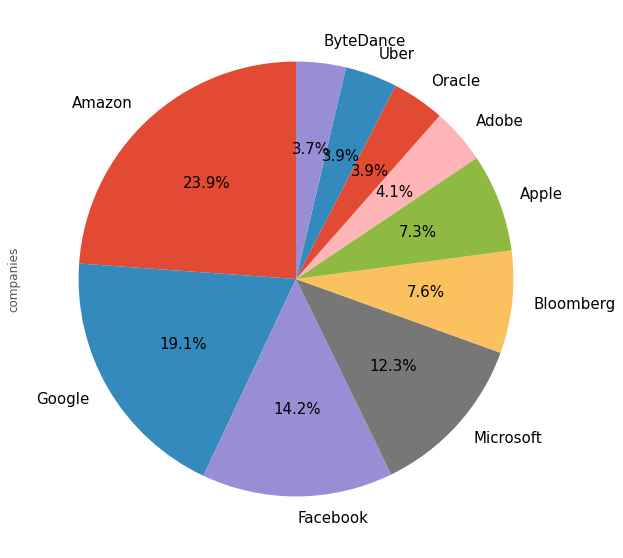

In [36]:
# Display the top 10 companies in a pie chart
plt.style.use('ggplot')
df['companies'].str.split(',').explode().value_counts().head(10).plot(kind='pie', figsize=(10, 10), autopct='%1.1f%%', startangle=90, fontsize=15)

In [29]:
# Get the average acceptance rate
df['acceptance_rate'].mean()

52.87335620354485

In [30]:
# Get the average acceptance rate for each difficulty level
df.groupby('difficulty')['acceptance_rate'].mean()

difficulty
Easy      60.815837
Hard      44.493834
Medium    52.461135
Name: acceptance_rate, dtype: float64

<AxesSubplot:xlabel='difficulty'>

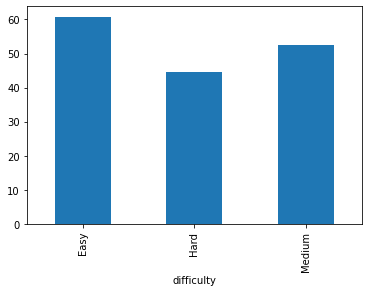

In [31]:
# Get the average acceptance rate for each difficulty level and show the results in a bar chart
df.groupby('difficulty')['acceptance_rate'].mean().plot(kind='bar')

In [37]:
# Get the average rating for each difficulty level
df.groupby('difficulty')['rating'].mean()

difficulty
Easy      71.331237
Hard      81.836364
Medium    78.615784
Name: rating, dtype: float64

<AxesSubplot:xlabel='difficulty'>

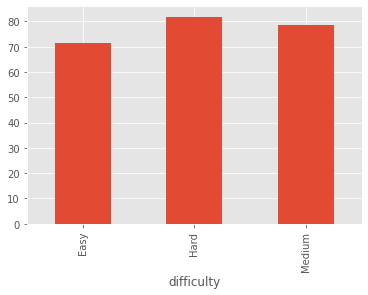

In [41]:
# Plot the average rating for each difficulty level
df.groupby('difficulty')['rating'].mean().plot(kind='bar')

In [39]:
# Get the number of questions asked by faang companies, indicated by 1 in the faang column
df['asked_by_faang'].value_counts()

1    1225
0     600
Name: asked_by_faang, dtype: int64